# Implementing all models 


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df = pd.read_csv("NAS.csv")                         #Read the csv
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [3]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN
df.dropna(inplace=True)  #Dropping all columns with NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [4]:
X = df[['Open']]
y= (df['Close']) 


In [5]:
from sklearn.model_selection import train_test_split #Creating a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:

from sklearn import preprocessing
# standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train, y_train)  #Fits it with a linar regression

from sklearn.linear_model import SGDRegressor
# SkLearn SGD classifier
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

from sklearn.tree import DecisionTreeRegressor
DTreeModel = DecisionTreeRegressor(max_depth=100)
DTreeModel.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=100)

In [8]:

print("LinearRegression intercept" +str(regressor.intercept_))
print("LinearRegression coef" +str(regressor.coef_))

print("SGDRegression intercept" +str(sgd.intercept_))
print("SGDRegression coef" +str(sgd.coef_))


LinearRegression intercept80.28803066101693
LinearRegression coef[55.3016636]
SGDRegression intercept[80.26973916]
SGDRegression coef[55.24763179]


In [9]:
LR_pred = regressor.predict(X_test)
SGD_pred = sgd.predict(X_test)
Dtree_pred = DTreeModel.predict(X_test)


In [10]:
from sklearn import metrics
print("SGD Regressor")
print('Mean Squared Error :',metrics.mean_squared_error(y_test, sgd.predict(X_test)))
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, sgd.predict(X_test)))
print("Score:", sgd.score(X_test, y_test))
print("\nLinear Regressor")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))
print("Score:", regressor.score(X_test, y_test))

SGD Regressor
Mean Squared Error : 6.062100583262054
Mean Absolute Error : 1.5298545048008039
Score: 0.9979237535410345

Linear Regressor
Mean Absolute Error: 1.5290304839950808
Mean Squared Error: 6.088779658694799
Root Mean Squared Error: 2.4675452698369686
Score: 0.9979146160588803


In [11]:
from sklearn import metrics
def ModelScoring(name, model): #pass the name of the model, and the model itself
    print(name)
    print('Mean Squared Error :',metrics.mean_squared_error(y_test, model.predict(X_test)))
    print('Mean Absolute Error :',metrics.mean_absolute_error(y_test, model.predict(X_test)))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    print("Score:", model.score(X_test, y_test))
    print()

In [12]:
ModelScoring("SGD Regressor", sgd)
ModelScoring("Linear Regressor", regressor)
ModelScoring("Decision Tree Regressor", DTreeModel)

SGD Regressor
Mean Squared Error : 6.062100583262054
Mean Absolute Error : 1.5298545048008039
Root Mean Squared Error: 2.4621333398624157
Score: 0.9979237535410345

Linear Regressor
Mean Squared Error : 6.088779658694799
Mean Absolute Error : 1.5290304839950808
Root Mean Squared Error: 2.4675452698369686
Score: 0.9979146160588803

Decision Tree Regressor
Mean Squared Error : 9.379844867594688
Mean Absolute Error : 1.9789864811512061
Root Mean Squared Error: 3.0626532398550586
Score: 0.9967874387063518



In [13]:
df2 = pd.DataFrame({'Actual': y_test, 'SGD': SGD_pred, 'LR': LR_pred})
df2.sort_values(by='Date',inplace=True) 

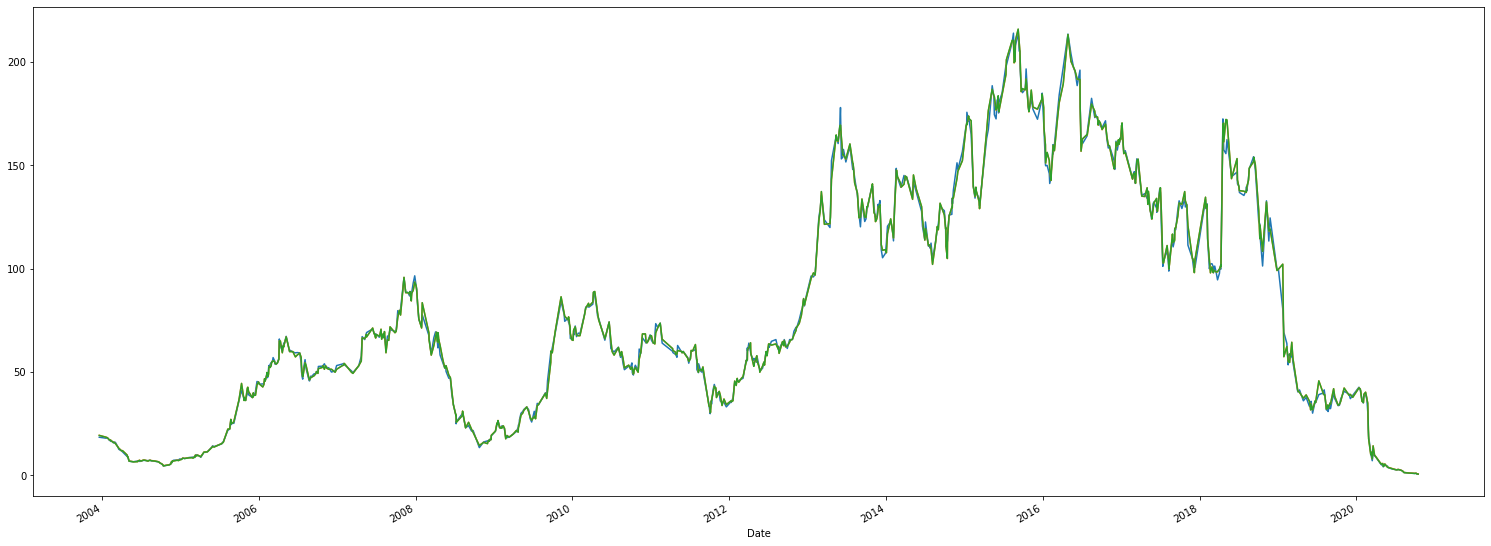

In [14]:
df2['Actual'].plot(figsize=(26,10))
df2['SGD'].plot(figsize=(26,10))
df2['LR'].plot(figsize=(26,10))

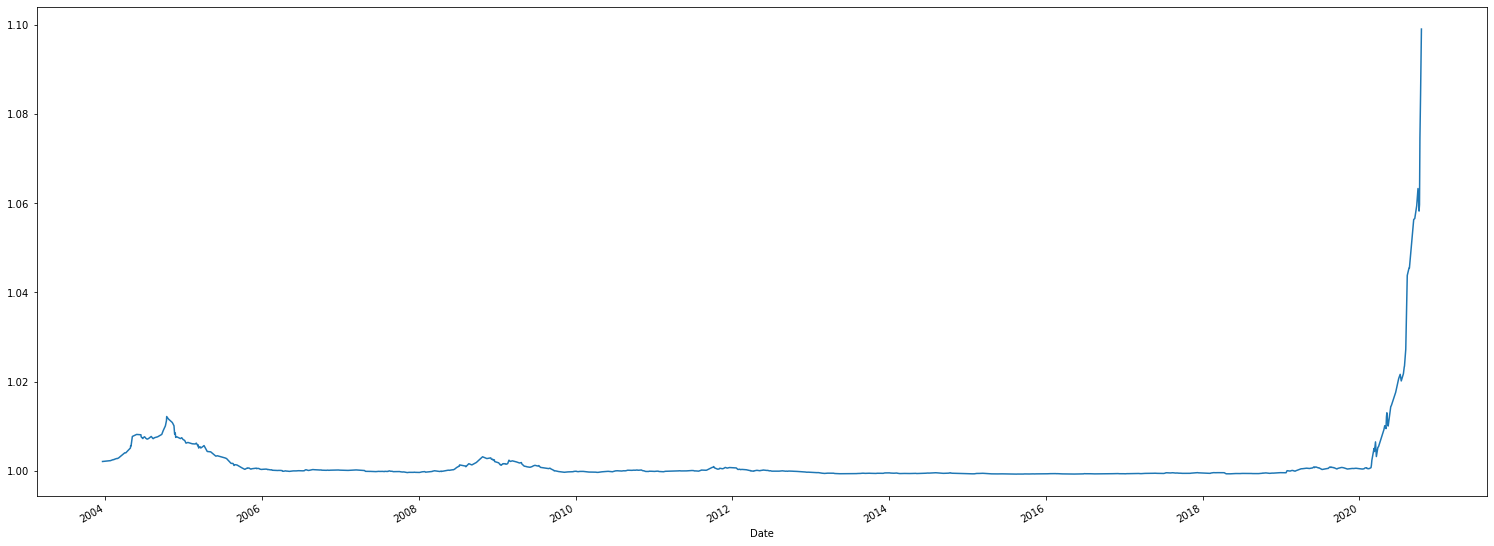

In [15]:
diffSGD_LR = df2['SGD']/df2['LR']
diffSGD_LR.plot(figsize=(26,10))

In [16]:
diffAct_LR = df2['Actual']/df2['LR']
diffAct_SGD = df2['Actual']/df2['SGD']

meanVal = (df2['LR']+df2['SGD'])/2
diffMeanAct = df2['Actual']/meanVal


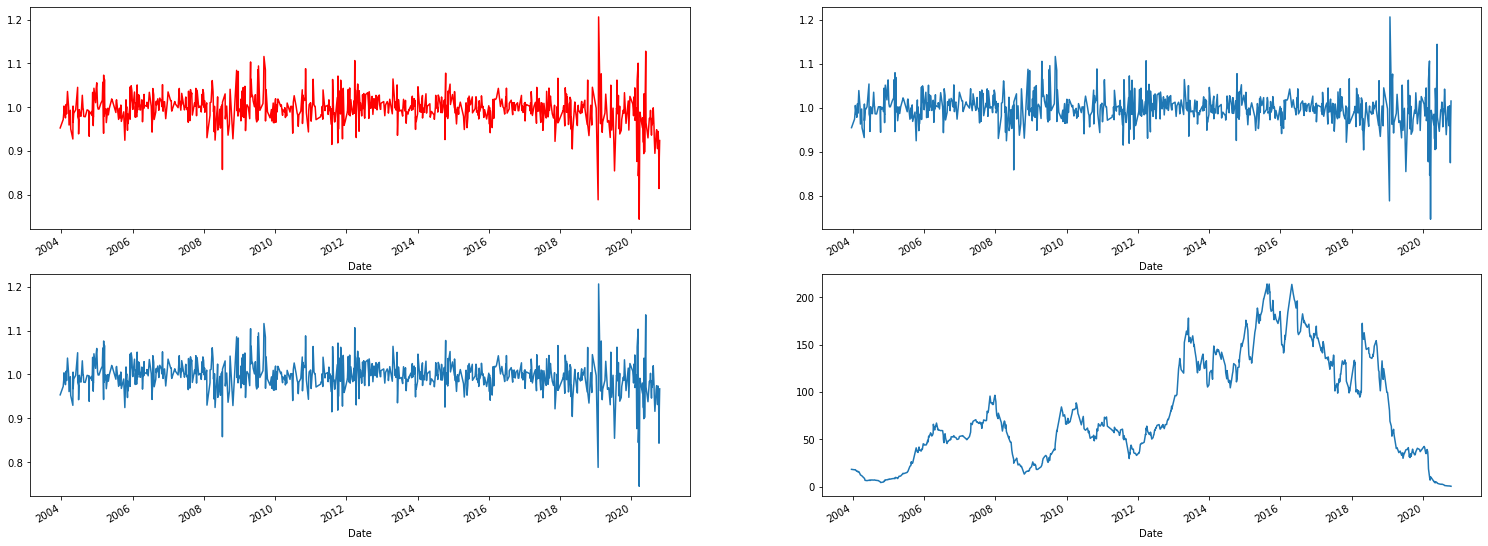

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

diffAct_SGD.plot(figsize=(26,10), color = "Red", ax=axes[0,0])
diffAct_LR.plot(figsize=(26,10), ax=axes[0,1])
diffMeanAct.plot(figsize=(26,10), ax=axes[1,0])
df2['Actual'].plot(figsize=(26,10), ax=axes[1,1])

## Predict todays closing price by giving todays opening price

In [41]:
#predicts the price according to the selected algorithm
def predictPrice(opening, algorithm):
    prediction = algorithm.predict(opening)
    return prediction

In [42]:
from pandas import DataFrame
#from statistics import mean

def assessDifference(opening, *argv, closing): #The args are the prediction algorithms you want to test on
    opPrice=pd.DataFrame([[opening]])
    opPrice=scaler.transform(opPrice)
    i=0
    predList = []
    for model in argv:
        prediction = predictPrice(opPrice, model)
        print("Model " +str(model) + ": "+ str(prediction), end=" ")
        predList.append(prediction)
        print(f'The prediction is off by {float(closing-prediction)} NOK')
        i+=1
    
    print(f'The mean of the models is {float(findMean(predList))} NOK')

    print(f'The mean of the models are off by {findMeanDifference(closing, predList)} NOK')

def findMean(predictionList):
    return sum(predictionList)/len(predictionList)
    
def findMeanDifference(closing, predictionList):
    return float(closing-findMean(predictionList))

        

In [43]:
list = assessDifference(0.7090, regressor, sgd, DTreeModel, closing=0.6768)

Model LinearRegression(): [0.70537912] The prediction is off by -0.02857912309417554 NOK
Model SGDRegressor(): [0.76484287] The prediction is off by -0.08804286812825535 NOK
Model DecisionTreeRegressor(max_depth=100): [0.6006] The prediction is off by 0.07619999999999993 NOK
The mean of the models is 0.6902739970741436 NOK
The mean of the models are off by -0.013473997074143651 NOK


In [44]:
assessDifference(0.6294, regressor, sgd, DTreeModel, closing=0.6722)

Model LinearRegression(): [0.62590788] The prediction is off by 0.04629212058989285 NOK
Model SGDRegressor(): [0.68544927] The prediction is off by -0.01324927084397498 NOK
Model DecisionTreeRegressor(max_depth=100): [0.605] The prediction is off by 0.06720000000000004 NOK
The mean of the models is 0.6387857167513608 NOK
The mean of the models are off by 0.033414283248639265 NOK


## Calculating accuracy

How percentually correct is the prediction.

In [ ]:
(actual-predicted)/actual * 100

How often does it correctly asess whether the price will go up or down by closing time, in comparison to the opening time.

In [ ]:
total = 0
correct = 0
for x : df
    
    if y > x && 
